In [1]:
# API reference 
# https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/dataframe.html


In [77]:
import argparse
from typing import Dict, Tuple, Any
import json
from pyspark.sql import SparkSession, HiveContext, DataFrame
from pyspark.sql.functions import *
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
spark.sql("show databases").show()

+------------+
|databaseName|
+------------+
|   aula_hive|
|     default|
| dimensional|
+------------+



In [4]:
spark.sql("use aula_hive")

DataFrame[]

In [5]:
tables = spark.sql("show tables")

In [6]:
tables.show()

+---------+---------------+-----------+
| database|      tableName|isTemporary|
+---------+---------------+-----------+
|aula_hive|      categoria|      false|
|aula_hive|         cidade|      false|
|aula_hive|        cliente|      false|
|aula_hive|dim_localizacao|      false|
|aula_hive|      dim_tempo|      false|
|aula_hive|         estado|      false|
|aula_hive|         filial|      false|
|aula_hive|    item_pedido|      false|
|aula_hive|       parceiro|      false|
|aula_hive|         pedido|      false|
|aula_hive|        produto|      false|
|aula_hive|   subcategoria|      false|
|aula_hive|  tbl_categoria|      false|
|aula_hive|     tbl_cidade|      false|
|aula_hive|    tbl_cliente|      false|
|aula_hive|     tbl_estado|      false|
|aula_hive|     tbl_filial|      false|
|aula_hive|tbl_item_pedido|      false|
|aula_hive|   tbl_parceiro|      false|
|aula_hive|     tbl_pedido|      false|
+---------+---------------+-----------+
only showing top 20 rows



In [7]:
query = """SELECT c.nm_cliente, sum(p.vr_total_pago) as compras 
    from pedido p
    join cliente c on c.id_cliente = p.id_cliente
    group by c.nm_cliente
    order by compras desc"""

In [8]:
pedidos = spark.sql(query)

In [9]:
pedidos.show()

+--------------------+------------------+
|          nm_cliente|           compras|
+--------------------+------------------+
|Cliente Magalu - ...|         260269.24|
|Cliente Magalu - ...|123784.04999999999|
|Cliente Magalu - ...|113467.04000000001|
|Cliente Magalu - ...|         109644.75|
|Cliente Magalu - ...|         107552.77|
|Cliente Magalu - ...|103986.99999999999|
|Cliente Magalu - ...|          84827.99|
|Cliente Magalu - ...| 84671.79999999999|
|Cliente Magalu - ...|           81783.0|
|Cliente Magalu - ...|           80409.2|
|Cliente Magalu - ...|          66494.87|
|Cliente Magalu - ...|          60884.07|
|Cliente Magalu - ...| 55236.64999999999|
|Cliente Magalu - ...|52127.399999999994|
|Cliente Magalu - ...| 52124.78999999999|
|Cliente Magalu - ...|          48619.74|
|Cliente Magalu - ...|          47625.24|
|Cliente Magalu - ...|          45088.93|
|Cliente Magalu - ...|          44087.68|
|Cliente Magalu - ...|          42678.42|
+--------------------+------------

In [10]:
pedidos.dtypes

[('nm_cliente', 'string'), ('compras', 'double')]

In [11]:
categorias = spark.sql("select * from categoria")

In [12]:
categorias.show()

+------------+---------------+-------------+
|id_categoria|   ds_categoria|perc_parceiro|
+------------+---------------+-------------+
|id_categoria|   ds_categoria|perc_parceiro|
|           1|Categoria - 001|          2.0|
|           2|Categoria - 002|          2.0|
|           3|Categoria - 003|          2.0|
|           4|Categoria - 004|          2.0|
|           5|Categoria - 005|          5.0|
|           6|Categoria - 006|          1.0|
|           7|Categoria - 007|          5.0|
|           8|Categoria - 008|          3.0|
|           9|Categoria - 009|          5.0|
|          10|Categoria - 010|          6.0|
|          11|Categoria - 011|          6.0|
|          12|Categoria - 012|          4.0|
|          13|Categoria - 013|          3.0|
|          14|Categoria - 014|          1.0|
|          15|Categoria - 015|          4.0|
|          16|Categoria - 016|          3.0|
|          17|Categoria - 017|          5.0|
|          18|Categoria - 018|          1.0|
|         

In [13]:
categorias = categorias.filter(categorias.id_categoria != 'id_categoria').drop()

In [14]:
categorias.show()

+------------+---------------+-------------+
|id_categoria|   ds_categoria|perc_parceiro|
+------------+---------------+-------------+
|           1|Categoria - 001|          2.0|
|           2|Categoria - 002|          2.0|
|           3|Categoria - 003|          2.0|
|           4|Categoria - 004|          2.0|
|           5|Categoria - 005|          5.0|
|           6|Categoria - 006|          1.0|
|           7|Categoria - 007|          5.0|
|           8|Categoria - 008|          3.0|
|           9|Categoria - 009|          5.0|
|          10|Categoria - 010|          6.0|
|          11|Categoria - 011|          6.0|
|          12|Categoria - 012|          4.0|
|          13|Categoria - 013|          3.0|
|          14|Categoria - 014|          1.0|
|          15|Categoria - 015|          4.0|
|          16|Categoria - 016|          3.0|
|          17|Categoria - 017|          5.0|
|          18|Categoria - 018|          1.0|
|          19|Categoria - 019|          2.0|
|         

In [15]:
categorias.count()

43

In [16]:
pedidos.show(5)

+--------------------+------------------+
|          nm_cliente|           compras|
+--------------------+------------------+
|Cliente Magalu - ...|         260269.24|
|Cliente Magalu - ...|123784.04999999999|
|Cliente Magalu - ...|113467.04000000001|
|Cliente Magalu - ...|         109644.75|
|Cliente Magalu - ...|         107552.77|
+--------------------+------------------+
only showing top 5 rows



In [ ]:
pedidos.printSchema()

## Carga todos os dataframes

In [5]:
df_categoria = spark.sql("select * from aula_hive.categoria")
df_cidade = spark.sql("select * from aula_hive.cidade")
df_cliente = spark.sql("select * from aula_hive.cliente")
df_estado = spark.sql("select * from aula_hive.estado")
df_filial = spark.sql("select * from aula_hive.filial")
df_item_pedido = spark.sql("select * from aula_hive.item_pedido")
df_parceiro = spark.sql("select * from aula_hive.parceiro")
df_pedido = spark.sql("select * from aula_hive.pedido")
df_produto = spark.sql("select * from aula_hive.produto")
df_subcategoria = spark.sql("select * from aula_hive.subcategoria")

## Tratamento do DF Cidade

In [41]:
type(df_cidade)

pyspark.sql.dataframe.DataFrame

In [56]:
# df_cidade = df_cidade.toPandas()
df_cidade = df_cidade.iloc[1:,:]

In [57]:
df_cidade.head()

,id_cidade,ds_cidade,id_estado
1,1058,Betim,1
2,33,ACRELANDIA,2
3,485,ASSIS BRASIL,2
4,958,BRASILEIA,2
5,1388,CAPIXABA,2


In [62]:
df_cidade['ds_cidade'] = pd.Series(df_cidade['ds_cidade'].apply(lambda name: name.title()))

/opt/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [65]:
# Save to parquet
df_cidade.to_parquet('cidades.parquet')

## Tratamento do DF cliente

In [67]:
df_cliente = df_cliente.toPandas()

In [70]:
df_cliente = df_cliente.iloc[1:,:]

In [76]:
df_cliente['flag_ouro'] = df_cliente['flag_ouro'].astype('int')

In [78]:
df_cliente.to_parquet('clientes.parquet')

## Tratamento do DF de pedidos e itens do pedido

In [80]:
df_pedido.show(10)

+-----------+--------------------+-----------+----------+---------+-------------+
|  id_pedido|           dt_pedido|id_parceiro|id_cliente|id_filial|vr_total_pago|
+-----------+--------------------+-----------+----------+---------+-------------+
|  id_pedido|           dt_pedido|id_parceiro|id_cliente|id_filial|vr_total_pago|
|47585891513|2021-06-23T00:00:...|         13|  33752975|      166|       318.48|
|49524083516|2021-08-03T00:00:...|         16|  43670652|      166|       249.59|
|49130099513|2021-07-26T00:00:...|         13|  47130570|      166|        64.87|
|49579056516|2021-08-04T00:00:...|         16|  16190735|      497|        93.59|
| 4868385806|2021-07-16T00:00:...|          6|  74672887|      497|       311.87|
|49959025513|2021-08-13T00:00:...|         13|  64040325|      497|        64.99|
|49579056513|2021-08-04T00:00:...|         13|  16190735|      497|       376.98|
| 4962532626|2021-08-05T00:00:...|          6|   8571960|      497|       175.37|
| 4976142355|202

In [81]:
df_item_pedido.show(10)

+----------+----------+----------+-----------+
| id_pedido|id_produto|quantidade|vr_unitario|
+----------+----------+----------+-----------+
| id_pedido|id_produto|quantidade|vr_unitario|
|4662926103|     29409|         1|     326.17|
|4855037753|     29409|         1|     326.17|
|4907077773|     29409|         1|     326.17|
|4907059553|     29409|         1|     326.17|
|4684176673|     29409|         1|     326.17|
|4700416275|     31772|         2|      51.74|
|5039703375|     31772|         1|      25.87|
|4737269456|     35926|         1|     562.77|
|4927459856|     35926|         1|     562.77|
+----------+----------+----------+-----------+
only showing top 10 rows



In [89]:
# df_full_pedido = spark.sql("select * from pedido p join item_pedido ip using(id_pedido)")

In [86]:
df_full_pedido.to_parquet('pedidos_full.parquet')

In [91]:
df_full_pedido.sample(10)

,id_pedido,dt_pedido,id_parceiro,id_cliente,id_filial,vr_total_pago,id_produto,quantidade,vr_unitario
491104,5040206026,2021-08-22T00:00:00.000Z,6,115780522,3,246.87,2538993,1,246.87
6918,49727920513,2021-08-08T00:00:00.000Z,13,106323930,762,207.99,2809865,1,207.99
788634,46663469716,2021-06-02T00:00:00.000Z,16,17765730,3,90.99,1753545,1,90.99
817517,51032833016,2021-09-06T00:00:00.000Z,16,42148175,231,157.65,4418312,1,31.58
621288,50864145013,2021-09-02T00:00:00.000Z,13,146261205,883,246.99,4927285,1,246.99
739326,47704195516,2021-06-26T00:00:00.000Z,16,14383452,547,158.59,3736279,1,158.59
541185,50163424516,2021-08-17T00:00:00.000Z,16,105584482,1694,159.87,1156152,1,53.29
782276,48989599013,2021-07-22T00:00:00.000Z,13,74924335,257,259.99,3557765,1,259.99
544966,49718257213,2021-08-08T00:00:00.000Z,13,124964712,231,207.99,1987899,1,207.99
468435,4832212176,2021-07-09T00:00:00.000Z,6,101009585,190,106.47,276447,1,106.47


In [95]:
pd.merge(df_full_pedido, df_cliente, on='id_cliente').to_parquet('pedidos_com_cliente.parquet')

In [4]:
pedidos = pd.read_parquet('pedidos_com_cliente.parquet')
pedidos.head()

,id_pedido,dt_pedido,id_parceiro,id_cliente,id_filial,vr_total_pago,id_produto,quantidade,vr_unitario,nm_cliente,flag_ouro
0,46626099016,2021-06-02T00:00:00.000Z,16,138633690,547,194.99,5077094,1,194.99,Cliente Magalu - 0138633690,0
1,46630423213,2021-06-02T00:00:00.000Z,13,106568537,875,51.99,3335368,1,51.99,Cliente Magalu - 0106568537,0
2,46646126513,2021-06-02T00:00:00.000Z,13,106568537,875,123.48,2539360,1,71.49,Cliente Magalu - 0106568537,0
3,46646126513,2021-06-02T00:00:00.000Z,13,106568537,875,123.48,3335368,1,51.99,Cliente Magalu - 0106568537,0
4,46627113513,2021-06-02T00:00:00.000Z,13,106568537,875,38.99,1792782,1,38.99,Cliente Magalu - 0106568537,0


In [15]:
# df_produto = df_produto.toPandas()
# df_produto = df_produto.iloc[1:,:]
# df_produto.to_parquet('produtos.parquet')

pedidos.head()

,id_pedido,dt_pedido,id_parceiro,id_cliente,id_filial,vr_total_pago,id_produto,quantidade,vr_unitario,nm_cliente,flag_ouro
0,46626099016,2021-06-02T00:00:00.000Z,16,138633690,547,194.99,5077094,1,194.99,Cliente Magalu - 0138633690,0
1,46630423213,2021-06-02T00:00:00.000Z,13,106568537,875,51.99,3335368,1,51.99,Cliente Magalu - 0106568537,0
2,46646126513,2021-06-02T00:00:00.000Z,13,106568537,875,123.48,2539360,1,71.49,Cliente Magalu - 0106568537,0
3,46646126513,2021-06-02T00:00:00.000Z,13,106568537,875,123.48,3335368,1,51.99,Cliente Magalu - 0106568537,0
4,46627113513,2021-06-02T00:00:00.000Z,13,106568537,875,38.99,1792782,1,38.99,Cliente Magalu - 0106568537,0


In [16]:
# Juntar com produtos
pd.merge(pedidos, df_produto, on='id_produto').to_parquet('pedidos_full.parquet')

In [17]:
pedidos_full = pd.read_parquet('pedidos_full.parquet')

In [18]:
pedidos_full.head()

,id_pedido,dt_pedido,id_parceiro,id_cliente,id_filial,vr_total_pago,id_produto,quantidade,vr_unitario,nm_cliente,flag_ouro,ds_produto,id_subcategoria
0,46626099016,2021-06-02T00:00:00.000Z,16,138633690,547,194.99,5077094,1,194.99,Cliente Magalu - 0138633690,0,Produto - 0005077094,1588
1,46630423213,2021-06-02T00:00:00.000Z,13,106568537,875,51.99,3335368,1,51.99,Cliente Magalu - 0106568537,0,Produto - 0003335368,1214
2,46646126513,2021-06-02T00:00:00.000Z,13,106568537,875,123.48,3335368,1,51.99,Cliente Magalu - 0106568537,0,Produto - 0003335368,1214
3,48239733513,2021-07-07T00:00:00.000Z,13,70466527,1052,591.35,3335368,1,45.49,Cliente Magalu - 0070466527,0,Produto - 0003335368,1214
4,48725689513,2021-07-18T00:00:00.000Z,13,46838825,3,185.63,3335368,1,55.89,Cliente Magalu - 0046838825,0,Produto - 0003335368,1214


In [26]:
pedidos_full['dt_pedido'].loc[2]

'2021-06-02T00:00:00.000Z'

In [28]:
pedidos_full['dt_pedido'] = pd.to_datetime(pedidos_full['dt_pedido'])

In [67]:
pedidos_full.to_parquet('pedidos_full.parquet')

In [34]:
pedidos_full['vr_total_pago'] = pedidos_full['vr_total_pago'].astype('float')
pedidos_full['quantidade'] = pedidos_full['quantidade'].astype('float')
pedidos_full['vr_unitario'] = pedidos_full['vr_unitario'].astype('float')

In [35]:
pedidos_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 834680 entries, 0 to 834679
Data columns (total 13 columns):
id_pedido          834680 non-null object
dt_pedido          834680 non-null datetime64[ns, UTC]
id_parceiro        834680 non-null object
id_cliente         834680 non-null object
id_filial          834680 non-null object
vr_total_pago      834680 non-null float64
id_produto         834680 non-null object
quantidade         834680 non-null float64
vr_unitario        834680 non-null float64
nm_cliente         834680 non-null object
flag_ouro          834680 non-null int64
ds_produto         834680 non-null object
id_subcategoria    834680 non-null object
dtypes: datetime64[ns, UTC](1), float64(3), int64(1), object(8)
memory usage: 129.2+ MB


In [38]:
temp = pedidos_full.sample(10)

In [65]:
pedidos_full['dt_ano'] = pedidos_full['dt_pedido'].dt.year
pedidos_full['dt_mes'] = pedidos_full['dt_pedido'].dt.month
pedidos_full['dt_dia_semana'] = pedidos_full['dt_pedido'].dt.dayofweek
pedidos_full['dt_trimestre'] = pedidos_full['dt_pedido'].dt.quarter
pedidos_full['dt_trimestre'] = pedidos_full['dt_pedido'].dt.quarter
pedidos_full['dt_semana'] = pedidos_full['dt_pedido'].dt.week

In [66]:
pedidos_full.head()

,id_pedido,dt_pedido,id_parceiro,id_cliente,id_filial,vr_total_pago,id_produto,quantidade,vr_unitario,nm_cliente,flag_ouro,ds_produto,id_subcategoria,dt_ano,dt_mes,dt_dia_semana,dt_trimestre,dt_semana
0,46626099016,2021-06-02 00:00:00+00:00,16,138633690,547,194.99,5077094,1.0,194.99,Cliente Magalu - 0138633690,0,Produto - 0005077094,1588,2021,6,2,2,22
1,46630423213,2021-06-02 00:00:00+00:00,13,106568537,875,51.99,3335368,1.0,51.99,Cliente Magalu - 0106568537,0,Produto - 0003335368,1214,2021,6,2,2,22
2,46646126513,2021-06-02 00:00:00+00:00,13,106568537,875,123.48,3335368,1.0,51.99,Cliente Magalu - 0106568537,0,Produto - 0003335368,1214,2021,6,2,2,22
3,48239733513,2021-07-07 00:00:00+00:00,13,70466527,1052,591.35,3335368,1.0,45.49,Cliente Magalu - 0070466527,0,Produto - 0003335368,1214,2021,7,2,3,27
4,48725689513,2021-07-18 00:00:00+00:00,13,46838825,3,185.63,3335368,1.0,55.89,Cliente Magalu - 0046838825,0,Produto - 0003335368,1214,2021,7,6,3,28


In [10]:
def df_to_pandas(_df):
    # to pandas
    df2 = _df.toPandas()
    # Limpar primeira linha
    df2 = df2.iloc[1:,:]
    return df2

In [70]:
df_subcategoria.show(5)

+---------------+--------------------+------------+
|id_subcategoria|     ds_subcategoria|id_categoria|
+---------------+--------------------+------------+
|id_subcategoria|     ds_subcategoria|id_categoria|
|            132|Sub-categoria - 0...|           1|
|            137|Sub-categoria - 0...|           1|
|            288|Sub-categoria - 0...|           1|
|            380|Sub-categoria - 0...|           1|
+---------------+--------------------+------------+
only showing top 5 rows



In [71]:
df_subcategoria = df_to_pandas(df_subcategoria)
df_subcategoria.head()

,id_subcategoria,ds_subcategoria,id_categoria
1,132,Sub-categoria - 00132,1
2,137,Sub-categoria - 00137,1
3,288,Sub-categoria - 00288,1
4,380,Sub-categoria - 00380,1
5,397,Sub-categoria - 00397,1


In [72]:
df_categoria = df_to_pandas(df_categoria)
df_categoria.head()

,id_categoria,ds_categoria,perc_parceiro
1,1,Categoria - 001,2.0
2,2,Categoria - 002,2.0
3,3,Categoria - 003,2.0
4,4,Categoria - 004,2.0
5,5,Categoria - 005,5.0


In [74]:
fato = pd.merge(pedidos_full, df_subcategoria, on='id_subcategoria')
fato.head()

,id_pedido,dt_pedido,id_parceiro,id_cliente,id_filial,vr_total_pago,id_produto,quantidade,vr_unitario,nm_cliente,flag_ouro,ds_produto,id_subcategoria,dt_ano,dt_mes,dt_dia_semana,dt_trimestre,dt_semana,ds_subcategoria,id_categoria
0,46626099016,2021-06-02 00:00:00+00:00,16,138633690,547,194.99,5077094,1.0,194.99,Cliente Magalu - 0138633690,0,Produto - 0005077094,1588,2021,6,2,2,22,Sub-categoria - 01588,27
1,46635829216,2021-06-02 00:00:00+00:00,16,138680502,3,90.99,3174943,1.0,90.99,Cliente Magalu - 0138680502,1,Produto - 0003174943,1588,2021,6,2,2,22,Sub-categoria - 01588,27
2,49885432216,2021-08-12 00:00:00+00:00,16,115952732,883,90.99,3174943,1.0,90.99,Cliente Magalu - 0115952732,0,Produto - 0003174943,1588,2021,8,3,3,32,Sub-categoria - 01588,27
3,50005347516,2021-08-14 00:00:00+00:00,16,122323727,1267,90.99,3174943,1.0,90.99,Cliente Magalu - 0122323727,0,Produto - 0003174943,1588,2021,8,5,3,32,Sub-categoria - 01588,27
4,50762680216,2021-08-31 00:00:00+00:00,16,21096190,435,90.99,3174943,1.0,90.99,Cliente Magalu - 0021096190,0,Produto - 0003174943,1588,2021,8,1,3,35,Sub-categoria - 01588,27


In [75]:
fato = pd.merge(fato, df_categoria, on='id_categoria')

In [76]:
fato.sample(10)

,id_pedido,dt_pedido,id_parceiro,id_cliente,id_filial,vr_total_pago,id_produto,quantidade,vr_unitario,nm_cliente,...,id_subcategoria,dt_ano,dt_mes,dt_dia_semana,dt_trimestre,dt_semana,ds_subcategoria,id_categoria,ds_categoria,perc_parceiro
420247,47043122216,2021-06-10 00:00:00+00:00,16,3380270,3,103.99,3440126,1.0,103.99,Cliente Magalu - 0003380270,...,2911,2021,6,3,2,23,Sub-categoria - 02911,27,Categoria - 027,2.0
631285,50006256513,2021-08-14 00:00:00+00:00,13,104441440,4,194.99,753532,1.0,194.99,Cliente Magalu - 0104441440,...,1890,2021,8,5,3,32,Sub-categoria - 01890,18,Categoria - 018,1.0
383735,48128039013,2021-07-05 00:00:00+00:00,13,62833222,4,25.99,2514209,1.0,25.99,Cliente Magalu - 0062833222,...,2906,2021,7,0,3,27,Sub-categoria - 02906,27,Categoria - 027,2.0
308261,51525966516,2021-09-15 00:00:00+00:00,16,129994595,860,51.99,3887700,1.0,51.99,Cliente Magalu - 0129994595,...,1318,2021,9,2,3,37,Sub-categoria - 01318,27,Categoria - 027,2.0
94948,50611626213,2021-08-27 00:00:00+00:00,13,48064040,231,207.99,1035672,1.0,207.99,Cliente Magalu - 0048064040,...,1588,2021,8,4,3,34,Sub-categoria - 01588,27,Categoria - 027,2.0
366849,46965743716,2021-06-09 00:00:00+00:00,16,9048057,1715,85.79,532181,1.0,85.79,Cliente Magalu - 0009048057,...,757,2021,6,2,2,23,Sub-categoria - 00757,27,Categoria - 027,2.0
486139,49546051213,2021-08-04 00:00:00+00:00,13,105392080,3,181.87,3323503,1.0,181.87,Cliente Magalu - 0105392080,...,3551,2021,8,2,3,31,Sub-categoria - 03551,18,Categoria - 018,1.0
469144,49703597016,2021-08-07 00:00:00+00:00,16,4947787,1450,77.99,1206578,1.0,77.99,Cliente Magalu - 0004947787,...,1370,2021,8,5,3,31,Sub-categoria - 01370,27,Categoria - 027,2.0
488007,49426203213,2021-08-02 00:00:00+00:00,13,5571230,229,181.87,3323503,1.0,181.87,Cliente Magalu - 0005571230,...,3551,2021,8,0,3,31,Sub-categoria - 03551,18,Categoria - 018,1.0
703131,49834715216,2021-08-10 00:00:00+00:00,16,21069890,3,77.99,4363903,1.0,77.99,Cliente Magalu - 0021069890,...,566,2021,8,1,3,32,Sub-categoria - 00566,18,Categoria - 018,1.0


In [19]:
fato.to_parquet('fato.parquet')

In [78]:
df_filial.show(10)

+---------+---------------+---------+
|id_filial|      ds_filial|id_cidade|
+---------+---------------+---------+
|id_filial|      ds_filial|id_cidade|
|        6|Filial - 000006|       22|
|        9|Filial - 000009|       22|
|       88|Filial - 000088|       22|
|       98|Filial - 000098|       22|
|      118|Filial - 000118|       22|
|      146|Filial - 000146|       22|
|      223|Filial - 000223|       22|
|      268|Filial - 000268|       22|
|      353|Filial - 000353|       22|
+---------+---------------+---------+
only showing top 10 rows



In [11]:
df_filial = df_to_pandas(df_filial)
df_filial.head()

,id_filial,ds_filial,id_cidade
1,6,Filial - 000006,22
2,9,Filial - 000009,22
3,88,Filial - 000088,22
4,98,Filial - 000098,22
5,118,Filial - 000118,22


In [12]:
df_cidade = df_to_pandas(df_cidade)
df_cidade.head()


,id_cidade,ds_cidade,id_estado
1,1058,Betim,1
2,33,ACRELANDIA,2
3,485,ASSIS BRASIL,2
4,958,BRASILEIA,2
5,1388,CAPIXABA,2


In [13]:

df_estado = df_to_pandas(df_estado)
df_estado.head()

,id_estado,ds_estado
1,1,31
2,2,AC
3,3,AL
4,4,AM
5,5,AP


In [14]:
df_cidade['ds_cidade'] = pd.Series(df_cidade['ds_cidade']).apply(lambda name: name.title())

In [15]:
fato = pd.merge(fato, df_filial, on='id_filial')

In [16]:
fato.head()

,id_pedido,dt_pedido,id_parceiro,id_cliente,id_filial,vr_total_pago,id_produto,quantidade,vr_unitario,nm_cliente,...,dt_mes,dt_dia_semana,dt_trimestre,dt_semana,ds_subcategoria,id_categoria,ds_categoria,perc_parceiro,ds_filial,id_cidade
0,46626099016,2021-06-02 00:00:00+00:00,16,138633690,547,194.99,5077094,1.0,194.99,Cliente Magalu - 0138633690,...,6,2,2,22,Sub-categoria - 01588,27,Categoria - 027,2.0,Filial - 000547,4
1,46643323216,2021-06-02 00:00:00+00:00,16,131867810,547,71.49,872394,1.0,71.49,Cliente Magalu - 0131867810,...,6,2,2,22,Sub-categoria - 01588,27,Categoria - 027,2.0,Filial - 000547,4
2,46954214716,2021-06-09 00:00:00+00:00,16,48354045,547,58.49,872394,1.0,58.49,Cliente Magalu - 0048354045,...,6,2,2,23,Sub-categoria - 01588,27,Categoria - 027,2.0,Filial - 000547,4
3,46702119016,2021-06-03 00:00:00+00:00,16,137306537,547,71.49,872394,1.0,71.49,Cliente Magalu - 0137306537,...,6,3,2,22,Sub-categoria - 01588,27,Categoria - 027,2.0,Filial - 000547,4
4,48237899716,2021-07-07 00:00:00+00:00,16,68739167,547,81.89,4604763,1.0,81.89,Cliente Magalu - 0068739167,...,7,2,3,27,Sub-categoria - 01588,27,Categoria - 027,2.0,Filial - 000547,4


In [18]:
fato = pd.merge(fato, df_cidade, on='id_cidade')

In [93]:
fato.head()

,id_pedido,dt_pedido,id_parceiro,id_cliente,id_filial,vr_total_pago,id_produto,quantidade,vr_unitario,nm_cliente,...,dt_trimestre,dt_semana,ds_subcategoria,id_categoria,ds_categoria,perc_parceiro,ds_filial,id_cidade,ds_cidade,id_estado
0,46626099016,2021-06-02 00:00:00+00:00,16,138633690,547,194.99,5077094,1.0,194.99,Cliente Magalu - 0138633690,...,2,22,Sub-categoria - 01588,27,Categoria - 027,2.0,Filial - 000547,4,Abadia Dos Dourados,14
1,46643323216,2021-06-02 00:00:00+00:00,16,131867810,547,71.49,872394,1.0,71.49,Cliente Magalu - 0131867810,...,2,22,Sub-categoria - 01588,27,Categoria - 027,2.0,Filial - 000547,4,Abadia Dos Dourados,14
2,46954214716,2021-06-09 00:00:00+00:00,16,48354045,547,58.49,872394,1.0,58.49,Cliente Magalu - 0048354045,...,2,23,Sub-categoria - 01588,27,Categoria - 027,2.0,Filial - 000547,4,Abadia Dos Dourados,14
3,46702119016,2021-06-03 00:00:00+00:00,16,137306537,547,71.49,872394,1.0,71.49,Cliente Magalu - 0137306537,...,2,22,Sub-categoria - 01588,27,Categoria - 027,2.0,Filial - 000547,4,Abadia Dos Dourados,14
4,48237899716,2021-07-07 00:00:00+00:00,16,68739167,547,81.89,4604763,1.0,81.89,Cliente Magalu - 0068739167,...,3,27,Sub-categoria - 01588,27,Categoria - 027,2.0,Filial - 000547,4,Abadia Dos Dourados,14


In [20]:
fato = pd.merge(fato, df_estado, on='id_estado')
fato.to_parquet('fato.parquet')
fato.head()

,id_pedido,dt_pedido,id_parceiro,id_cliente,id_filial,vr_total_pago,id_produto,quantidade,vr_unitario,nm_cliente,...,dt_semana,ds_subcategoria,id_categoria,ds_categoria,perc_parceiro,ds_filial,id_cidade,ds_cidade,id_estado,ds_estado
0,46626099016,2021-06-02 00:00:00+00:00,16,138633690,547,194.99,5077094,1.0,194.99,Cliente Magalu - 0138633690,...,22,Sub-categoria - 01588,27,Categoria - 027,2.0,Filial - 000547,4,Abadia Dos Dourados,14,MG
1,46643323216,2021-06-02 00:00:00+00:00,16,131867810,547,71.49,872394,1.0,71.49,Cliente Magalu - 0131867810,...,22,Sub-categoria - 01588,27,Categoria - 027,2.0,Filial - 000547,4,Abadia Dos Dourados,14,MG
2,46954214716,2021-06-09 00:00:00+00:00,16,48354045,547,58.49,872394,1.0,58.49,Cliente Magalu - 0048354045,...,23,Sub-categoria - 01588,27,Categoria - 027,2.0,Filial - 000547,4,Abadia Dos Dourados,14,MG
3,46702119016,2021-06-03 00:00:00+00:00,16,137306537,547,71.49,872394,1.0,71.49,Cliente Magalu - 0137306537,...,22,Sub-categoria - 01588,27,Categoria - 027,2.0,Filial - 000547,4,Abadia Dos Dourados,14,MG
4,48237899716,2021-07-07 00:00:00+00:00,16,68739167,547,81.89,4604763,1.0,81.89,Cliente Magalu - 0068739167,...,27,Sub-categoria - 01588,27,Categoria - 027,2.0,Filial - 000547,4,Abadia Dos Dourados,14,MG


In [7]:
fato = pd.read_parquet('fato.parquet')

In [24]:
sales_by_state = fato.groupby('ds_estado')['vr_total_pago'].sum()

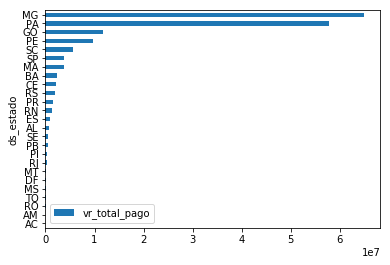

In [95]:
pd.DataFrame(sales_by_state).reset_index().sort_values(by='vr_total_pago') \
    .plot.barh(y='vr_total_pago', x='ds_estado')

In [79]:
# plt.barh(sales_by_state.index, width=10, height=.8)
# np.array(sales_by_state.index)
# np.array(sales_by_state.values)

array([3.89900000e+01, 7.03266270e+05, 5.26470000e+02, 2.34828629e+06,
       2.16830407e+06, 1.10663550e+05, 9.89622770e+05, 1.17138639e+07,
       3.78890049e+06, 6.50135983e+07, 5.72193000e+04, 1.79687980e+05,
       5.78965458e+07, 5.21284900e+05, 9.76980128e+06, 3.96031820e+05,
       1.45142617e+06, 2.74262640e+05, 1.29596307e+06, 1.15134100e+04,
       1.94672018e+06, 5.55321323e+06, 5.72985810e+05, 3.86614591e+06,
       3.31532600e+04])